![](线性回归的梯度下降法.png)


![](线性回归梯度下降公式1.png)

![](线性回归梯度下降公式.png)
![](线性回归梯度下降公式2.png)

在本课程中，使用$$J(\boldsymbol{\theta})=\operatorname{MSE}(y, \hat{y})$$公式来进行操作

# 在线性回归中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size = 100)

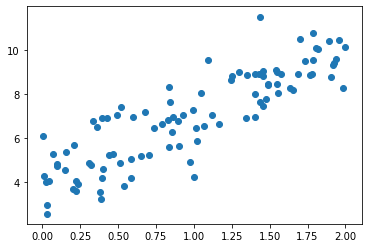

In [3]:
plt.scatter(x,y)
plt.show()

In [4]:
# 为了适应多特征
X = x.reshape(-1,1)
X.shape

(100, 1)

![](线性回归梯度下降公式2.png)

In [7]:
def J(theta,X_b,y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [8]:
def dJ(theta, X_b,y):
#     res = np.empty(len(theta))
#     res[0] = np.sum(X_b.dot(theta) - y)
    
#     for i in range(1,len(theta)):
#         res[i] = np.sum((X_b.dot(theta) - y).dot(X_b[:,i]))
        
#     return res * 2 / len(X_b)

    # 向量化实现
#     return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(X_b)
    return X_b.T.dot((X_b.dot(theta) - y)) * 2 / len(X_b)

In [12]:
def gradient_descent(X_b,y,initial_theta,eta,n_iter = 1e4,epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iter:
        gradient = dJ(theta,X_b,y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        i_iter+=1
    return theta

In [14]:
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b,y,initial_theta,eta)

In [15]:
theta

array([4.02145786, 3.00706277])

### 调用自己封装的线性回归算法

In [19]:
from Machine_Learning.LinearReg.LinearRegression import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit_gd(X,y)

LinearRegression()

In [20]:
lin_reg.coef_

array([3.00706277])

In [21]:
lin_reg.interception_

4.021457858204859

### 向量化实现

In [22]:
def dJ(theta, X_b,y):
    res = (X_b.dot(theta) - y).dot(X_b)
    return res * 2 / len(X_b)

In [23]:
X_b = np.hstack([np.ones((len(X),1)),X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b,y,initial_theta,eta)
theta

array([4.02145786, 3.00706277])

### 以下为实验代码，与内容无关

In [37]:
X = np.array(np.random.randint(0,10,20).reshape(4,-1))
y = np.array([0,0,0,1,0])

In [38]:
X

array([[2, 3, 9, 7, 0],
       [9, 1, 4, 0, 4],
       [7, 7, 5, 7, 6],
       [6, 6, 2, 5, 0]])

In [39]:
X.shape

(4, 5)

In [44]:
z = X.dot(y)-np.array([7,0,7,4])
z

array([0, 0, 0, 1])

In [45]:
z.dot(X)

array([6, 6, 2, 5, 0])

In [46]:
X.T.dot(z)

array([6, 6, 2, 5, 0])

### 向量化后的效率测试

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target
X = X[y < 50]
y = y[y < 50]
print("X shape:" + str(X.shape))
print("y shape:" + str(y.shape))

X shape:(490, 13)
y shape:(490,)


In [2]:
from Machine_Learning.LinearReg.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,seed=666)

In [3]:
from Machine_Learning.LinearReg.LinearRegression import LinearRegression
lin_reg = LinearRegression()
%time lin_reg.fit_normal(X_train,y_train)
lin_reg.score(X_test,y_test)

Wall time: 126 ms


0.7989582352420643

In [4]:
lin_reg.fit_gd(X_train,y_train)
lin_reg.score(X_test,y_test)

D:\Tool\Ana\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\79000\Machine learning\Machine_Learning\LinearReg\LinearRegression.py:25: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
C:\Users\79000\Machine learning\Machine_Learning\LinearReg\LinearRegression.py:40: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):


nan

In [24]:
lin_reg.fit_gd(X_train,y_train,eta = 0.0001)
lin_reg.score(X_test,y_test)

D:\Tool\Ana\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\79000\Machine learning\Machine_Learning\LinearReg\LinearRegression.py:25: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
C:\Users\79000\Machine learning\Machine_Learning\LinearReg\LinearRegression.py:40: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
C:\Users\79000\Machine learning\Machine_Learning\LinearReg\LinearRegression.py:31: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(X_b)
C:\Users\79000\Machine learning\Machine_Learning\LinearReg\LinearRegression.py:39: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradient


nan

In [13]:
lin_reg.fit_gd(X_train,y_train,eta = 0.0000001,n_iter=1e10)
lin_reg.score(X_test,y_test)

0.05101163200684544

### 使用梯度下降法进行数据归一化

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train_standard = standardScaler.transform(X_train)

In [18]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard,y_train)

Wall time: 298 ms


LinearRegression()

In [19]:
X_test_standard = standardScaler.transform(X_test)

In [20]:
lin_reg3.score(X_test_standard,y_test)

0.798971708368255

### 梯度下降法的优势

In [25]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m,n))

true_theta = np.random.uniform(0.0,100.0,size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0,10,size=m)

In [26]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X,big_y)

Wall time: 10.1 s


LinearRegression()

In [27]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X,big_y)

Wall time: 7.23 s


LinearRegression()